In [2]:
import joblib as job
import pymssql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\bit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [2]:
# loaded_model_ln = job.load('./사용빈도머신러닝10대testModel2.pkl')

In [2]:
# loaded_model_ln = job.load('./사용빈도머신러닝20대testModel2.pkl')

In [3]:
loaded_model_ln = job.load('./사용빈도머신러닝50대testModel2.pkl')

<h4>DB 연결</h4>

In [4]:
conn = pymssql.connect(server="14.32.18.226", user="as", password="1234", database="YL1")

In [5]:
cursor = conn.cursor()

In [ ]:
# # insert 쿼리
# cursor.execute("insert into test_predict_spend value (?,?)", Date_temp, pred_model_result)
# conn.commit()

In [6]:
model_dp = pd.DataFrame(columns=['Date', 'Age', 'Spend'])

In [7]:
for Date_temp in range(0, 29):
#     for Age_temp in range(0, 9):
    X = int(Date_temp)
    Age_temp = 30005
    Y = int(Age_temp)
    pred_model_result = loaded_model_ln.predict([[X]])
    n = pred_model_result.astype('int32')
    X = int(X)
#     Y = int(Y)
    n = n[0]
    n = n[0]
    n = int(n)
    cursor.execute("insert into test_predict_age_spend2 values(%d,%d,%d)", (X,Y,n))

In [8]:
conn.commit()

In [19]:
data = pd.read_sql("select * from test_predict_age_spend2", conn)

In [20]:
data

,date,age,spend
0,0,30001,229
1,1,30001,1671
2,2,30001,3113
3,3,30001,4555
4,4,30001,5996
5,5,30001,7438
6,6,30001,8880
7,7,30001,10322
8,8,30001,11764
9,9,30001,13206


In [10]:
# 그래프 폰트 설정
import matplotlib.font_manager as fm
path = 'C:\\Users\\bit\\Downloads\\NanumBarunGothic.ttf'
fp = fm.FontProperties(fname=path, size=11)

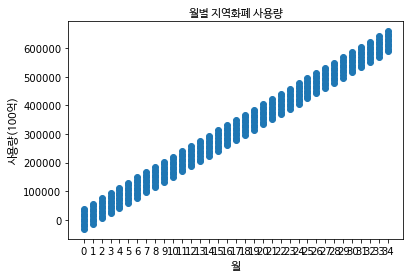

In [11]:
X = data['date']
y = data['spend']
plt.plot(X, y, 'o')
plt.title("월별 지역화폐 사용량", fontproperties=fp)
plt.xlabel("월", fontproperties=fp)
plt.ylabel("사용량(100억)", fontproperties=fp)
# plt.yticks([10000000,20000000,30000000,40000000,50000000,60000000])
plt.show()